# k-Means Clustering

## The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    
    
### The goal
The goal is to study the underlying structure of the data.

## Load the necessary libraries and the data

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [22]:
data = pd.read_csv('AirQualityUCI.csv')

In [23]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


## Preprocess the data

In [24]:
(data.iloc[:, 2:] == -200.0).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

Notice the many missing values. Replace them with the median.

In [25]:
data.replace(-200.0, data.median(), inplace=True)

## Visualize the data

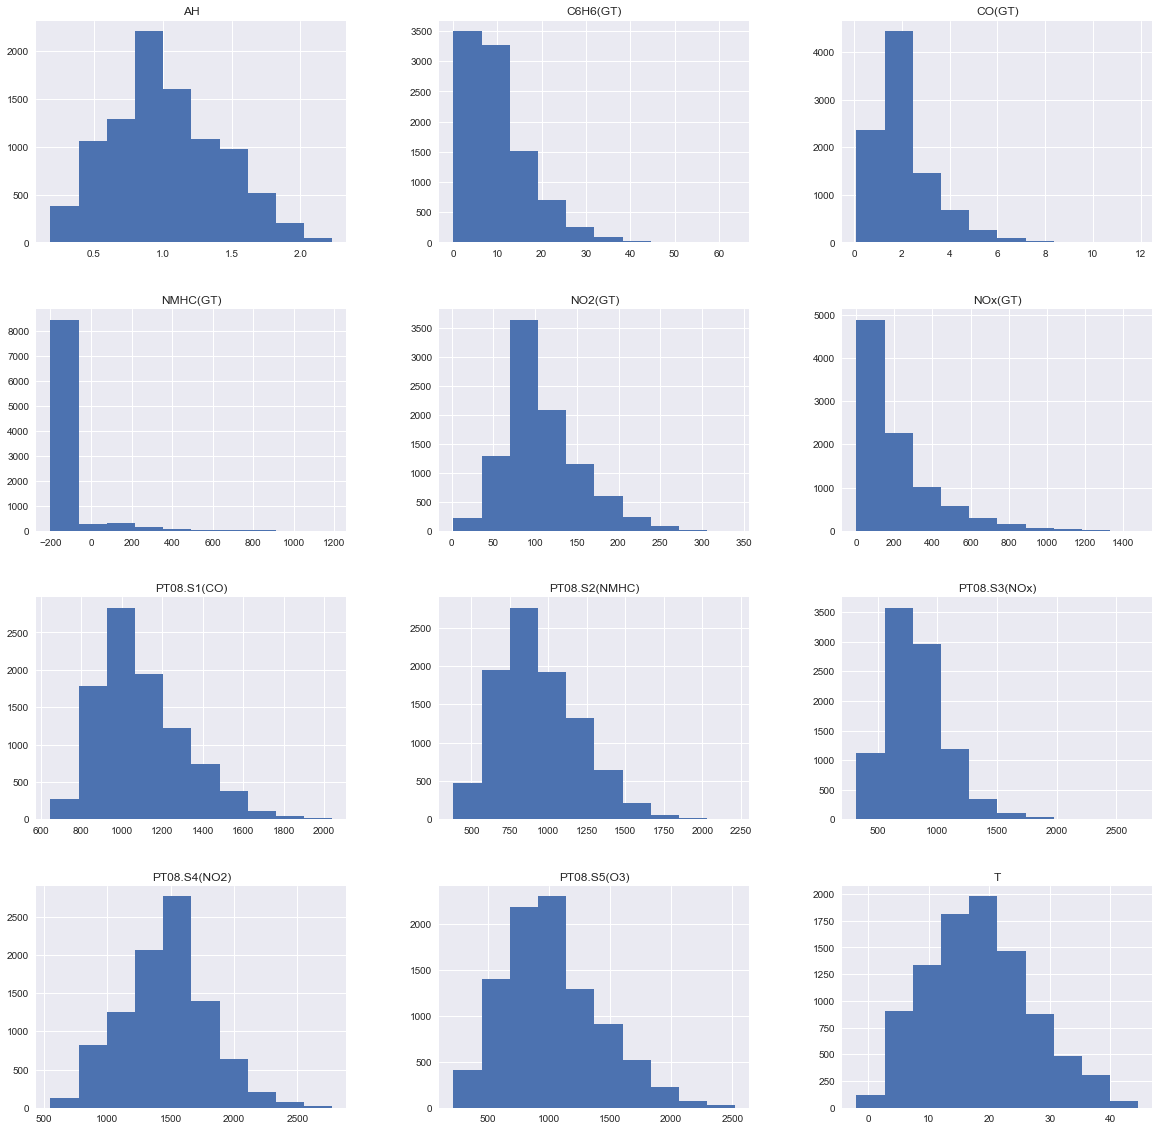

In [26]:
pd.DataFrame.hist(data, figsize=(20,20));

Visualize the relationships between features.

In [27]:
from pandas.plotting import scatter_matrix

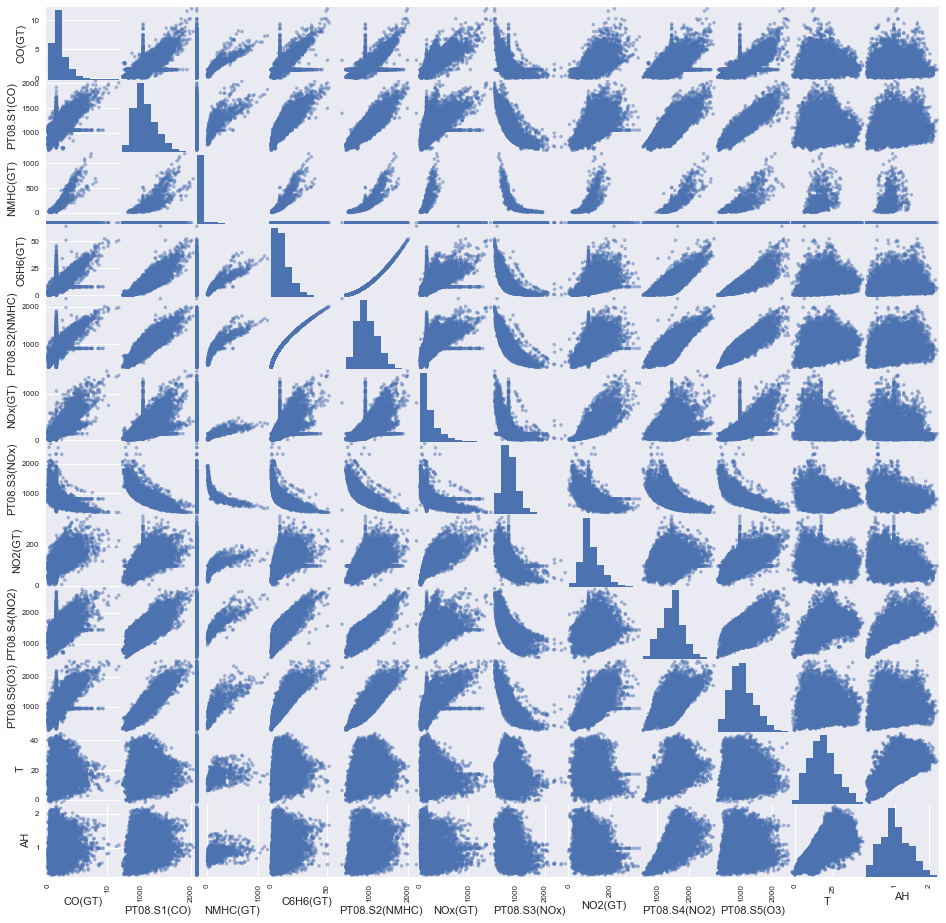

In [28]:
scatter_matrix(data, figsize=(16,16));

## k-Means clustering

### Determine which features to use
Determining which features to use in order to infer clusters may need domain knowledge of the dataset. In this example, we select two features, namely `PT08.S1 (tin oxide) hourly average sensor response` and  `PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)` metal oxide sensors. We would like to investigate how the sensors respond to compounds or co-pollutants and other environmental factors.

In [29]:
X = data[['PT08.S1(CO)', 'PT08.S2(NMHC)']].values

In [30]:
X

array([[1360., 1046.],
       [1292.,  955.],
       [1402.,  939.],
       ...,
       [1142., 1063.],
       [1003.,  961.],
       [1071., 1047.]])

### Determine the number of clusters

The first step in k-Means clustering is choosing the value of $k$. The elbow method helps to determine how many clusters to use.

Text(0.5,1,'Elbow Curve')

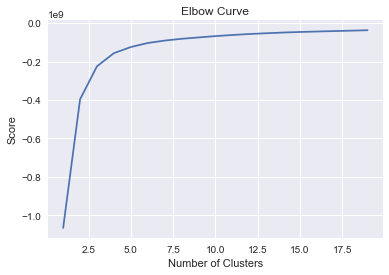

In [31]:
n_clusters = range(1, 20) # range for number of clusters

kmeans = [KMeans(n_clusters=i) for i in n_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(n_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

The score values start to increase slowly after 5 clusters. Set $k = 5$.

### Fit the model

Now cluster the data. Create a clustering data type with number of clusters

In [32]:
k_means = KMeans(n_clusters=5,   # the number of clusters
             random_state=5) # set seed to get same results as your colleague

In [33]:
output = k_means.fit(X) # fit the model

Summary of the model and the default model parameters.

### Prediction

Determine the cluster for each data point.

In [34]:
labels = k_means.predict(X)

In [35]:
labels

array([4, 4, 4, ..., 4, 0, 4])

### Plot model outputs

In [36]:
colors = {0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y',
          4 : 'c'} # map integer label to color
label_color = [colors[l] for l in labels]


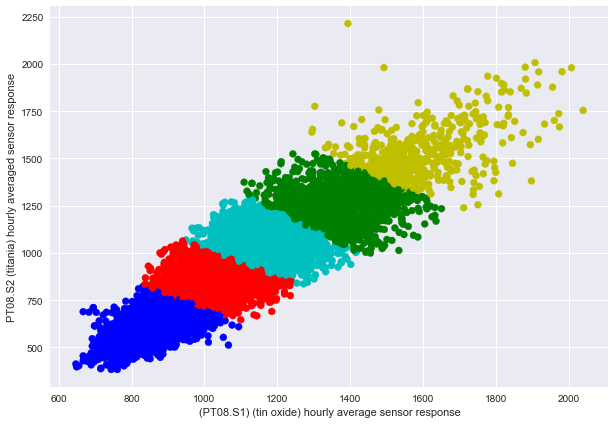

In [37]:
plt.figure('k-Means', figsize=(10,7))
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=label_color, cmap=cmap)

Interpretion: The elbow curve helped us determine the number of clusters to use for prediction. We are able to determine 5 clusters and group the measurements. One possible explanation for the clusters observed between the tin oxide and titania oxide sensors could be the interference from other co-pollutants to be measured by the remaining sensors. 

### Determining model performance

We use the silhouette coefficient to measure how well samples are clustered. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other. The best value is 1 and the worst, -1. Values near 0 indicate overlapping clusters. Negative values indicate a different cluster would probably be better.

Source: [sklearn.metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)

In [39]:
from sklearn import metrics
print(metrics.silhouette_score(X, labels))

0.41592001997244876


### Agglomerative clustering

Let's use agglomerative clustering to determine the number of clusters and create a dendogram.

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
Z = sch.linkage(X, 'ward') # Can take some time to run
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)

### Fit and make predictions

Say we pick 10000 as a threshold. The number of clusters is the number of branches cut off at the threshold. This case, there are 4 branches at the 10000 threshold. We choose 4 clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y = hc.fit_predict(X)

### Model performance

Determine model performance using the silhouette accuracy measure. According to the sklearn documentation, "the Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1."

In [ ]:
print(metrics.silhouette_score(X, y))

With 4 clusters, we have slightly less model accuracy compared with k-Means clustering.

## Summary

We used k-Means clustering to determine the underlying structure of the data. The elbow method was used to determine an optimal number of clusters. With this cluster number, the model predicted that two metal oxide sensors were able to group data points into the five clusters. A silhoutte coefficient determined how well a data point was grouped. We also compared k-Means performance with agglomerative clustering. 